# Algoritmos - Actividad Guiada 1

**Nombre**: Adrián García López<br>
**URL**: https://github.com/adri14gl/Algoritmos_de_Optimizacion_VIU


## 1.- Torres de Hanoi con Divide y vencerás

In [21]:
def Torres_Hanoi(N, desde, hasta):
  if N ==1 :
    print("Lleva la ficha en" ,desde , "hasta", hasta )

  else:
    Torres_Hanoi(N-1, desde, 6-desde-hasta ) # La fórmula 6-desde-hasta permite obtener, a partir del origen y el destino, la torre pivote.
    print("Lleva la ficha en" ,desde , "hasta", hasta )
    Torres_Hanoi(N-1, 6-desde-hasta  , hasta )

N = 3
desde = 1
hasta = 3
print (f"Los pasos para llevar {N} fichas desde {desde} hasta {hasta} son:")
Torres_Hanoi(N, desde, hasta)

# Roja
# Amarilla
# Verde

# Torres_Hanoi(3, 1 , 3) [Roja//Amarilla//Verde, -, -]
# -> Torres_Hanoi (2, 1, 2)
# -> -> Torres_Hanoi (1, 1, 3)
# -> -> print ("LLeva ficha (Roja) desde 1 hasta 3") [Amarilla// Verde, -, Roja]
# -> print ("LLeva ficha (Amarilla) desde 1 hasta 2") [Verde, Amarilla, Roja] 
# -> -> Torres_Hanoi (1, 3, 2)
# -> -> print ("LLeva ficha (Roja) desde 3 hasta 2") [Verde, Roja//Amarilla, -]
# print ("Lleva ficha (Verde) desde 1 hasta 3") [-, Roja//Amarilla, Verde]
# -> Torres_Hanoi (2, 2, 3)
# -> -> Torres_Hanoi (1, 2, 1)
# -> -> print("Lleva ficha (Roja) desde 2 hasta 1") [Roja, Amarilla, Verde]
# -> print ("Lleva ficha (Amarilla) desde 2 hasta 3") [Roja, - , Amarilla//Verde]
# -> -> -> Torres_Hanoi (1, 1, 3)
# -> -> -> print ("Lleva ficha (Roja) desde 1 hasta 3") [-, -, Roja//Amarilla//Verde]

Los pasos para llevar 3 fichas desde 1 hasta 3 son:
Lleva la ficha en 1 hasta 3
Lleva la ficha en 1 hasta 2
Lleva la ficha en 3 hasta 2
Lleva la ficha en 1 hasta 3
Lleva la ficha en 2 hasta 1
Lleva la ficha en 2 hasta 3
Lleva la ficha en 1 hasta 3


## 2.- Sucesión de Fibonacci

In [13]:
#Sucesión_de_Fibonacci
#https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci
#Calculo del termino n-simo de la suscesión de Fibonacci
def fibonacci_rec(N:int):
  if N < 2:
    return 1
  else:
    return fibonacci_rec(N-1)+fibonacci_rec(N-2)

num = 25
print (f"El resultado de la sucesión de Fibonacci calculado por recursión para el número {num} es {fibonacci_rec(num)}")

El resultado de la sucesión de Fibonacci calculado por recursión para el número 25 es 121393


121393

# 2.1.- Propuesta de Mejora: Fibonacci optimizado
* **Programación dinámica**: complejidad lineal
* **Fórmula de Binet**: complejidad constante 

### 2.1.1.- Sucesión de Fibonacci mediante programación dinámica:
Para conseguir reducir la complejidad del cálculo a $O(n)$ sustituimos el descenso que realizábamos por el árbol de recursión en la función anterior por una construcción iterativa desde valores mayores que 1 hasta n.

In [3]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import math

In [14]:
# Sucesión de Fibonacci mediante programación dinámica
def fibonacci_pd(n: int):
    if n < 2:
        return 1
    
    a, b = 1, 1
    for _ in range(2, n + 1): 
        a, b = b, a + b
    return b

num = 25
print (f"El resultado de la sucesión de Fibonacci calculado iterativamente para el número {num} es {fibonacci_rec(num)}")

El resultado de la sucesión de Fibonacci calculado iterativamente para el número 25 es 121393


### 2.1.2.- Fórmula de Binet para la Sucesión de Fibonacci

La fórmula permite calcular el término $n$-ésimo de la sucesión de Fibonacci en tiempo constante $O(1)$:

$$F_n = \frac{\varphi^n - \psi^n}{\sqrt{5}}$$

Donde:
* $\varphi$ (Número Áureo) = $\frac{1 + \sqrt{5}}{2} \approx 1.618033$
* $\psi$ (Conjugado) = $\frac{1 - \sqrt{5}}{2} \approx -0.618033$

In [15]:
# Sucesión de Fibonacci mediante Fórmula de Binet
def fibonacci_binet(n: int):
    phi = (1 + math.sqrt(5)) / 2
    psi = (1 - math.sqrt(5)) / 2
    
    fibo = (phi**(n+1) - psi**(n+1)) / math.sqrt(5) # Es necesario sumar 1 a n ya que tal como hemos definido las funciones anteriores F_0=1, F_1=1, F_2=2
                                                    # mientras que la definición habitual de Fibonacci suele estar desfasada en un término.
    return round(fibo)

num = 25
print (f"El resultado de la sucesión de Fibonacci calculado mediante la fórmual de Binet para el número {num} es {fibonacci_rec(num)}")

El resultado de la sucesión de Fibonacci calculado mediante la fórmual de Binet para el número 25 es 121393


### 2.1.3.1- Comparativa de eficiencia (exponencial vs resto)

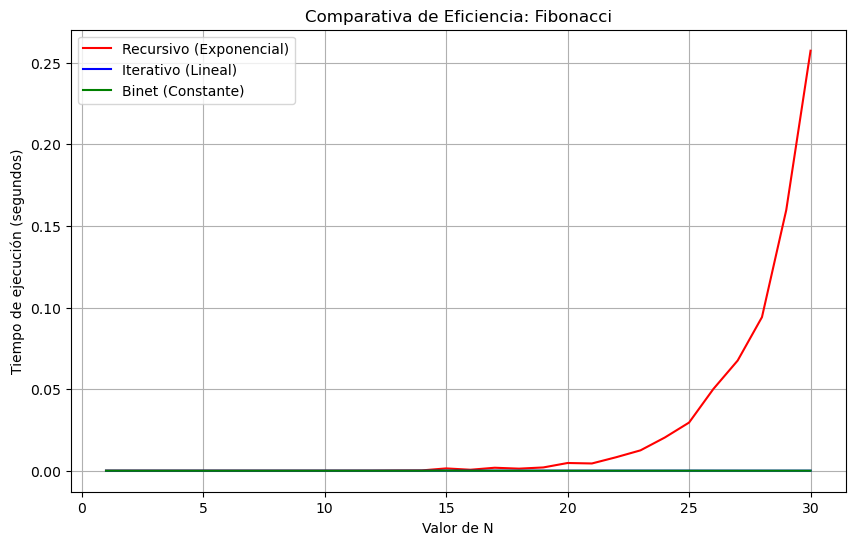

In [6]:
max_n = 30
valores = list(range(1, max_n + 1))
tiempos_rec, tiempos_pd, tiempos_binet = [], [], []

for n in valores:
    # Fibonacci Recursivo
    start = time.perf_counter()
    fibonacci_rec(n)
    tiempos_rec.append(time.perf_counter() - start)
    
    # Fibonacci Iterativo
    start = time.perf_counter()
    fibonacci_pd(n)
    tiempos_pd.append(time.perf_counter() - start)
    
    # Fibonacci Binet
    start = time.perf_counter()
    fibonacci_binet(n)
    tiempos_binet.append(time.perf_counter() - start)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(valores, tiempos_rec, label='Recursivo (Exponencial)', color='red')
plt.plot(valores, tiempos_pd, label='Iterativo (Lineal)', color='blue')
plt.plot(valores, tiempos_binet, label='Binet (Constante)', color='green')

plt.xlabel('Valor de N')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Comparativa de Eficiencia: Fibonacci')
plt.legend()
plt.grid(True)

### 2.1.3.2- Comparativa de eficiencia (lineal vs constante)
A fin de poder observar las diferencias entre la ejecución de complejidad lineal y constante tenemos que alcanzar cotas mayores de n, cotas que resultarían prohibitivas para utilizar el método recursivo ya que el tiempo de cómputo explota y se vuelve prohibitivo a partir de aproximadamente n=45, por lo que en el siguiente código se comparan únicamente las técnicas iterativa y con la fórmula de Bient.

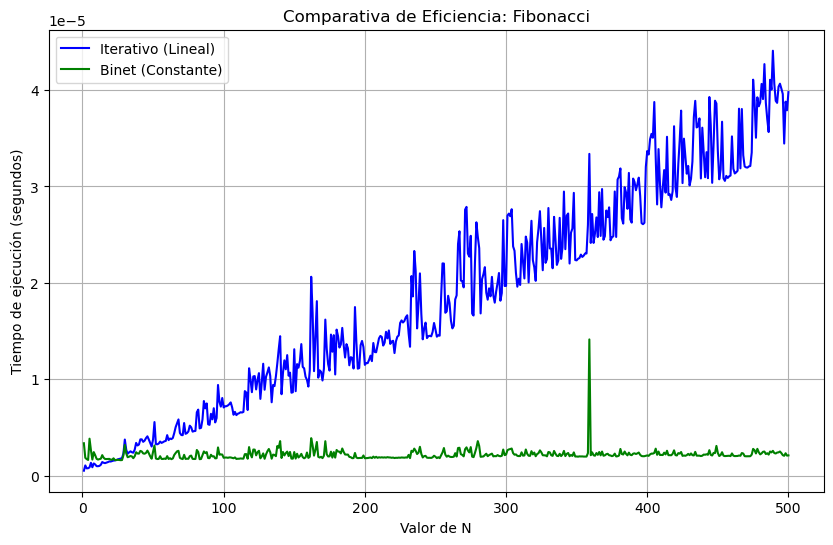

In [11]:
max_n = 500
valores = list(range(1, max_n + 1))
tiempos_pd, tiempos_binet = [], []

n_iteraciones = 500 #Ejecutaremos n_iteraciones para promediar y mitigar los picos que aparecen en la gráfica ocasionados por las distorsiones que
                     # introduce el hecho de que el sistema operativo pueda decidir ejecutar otras tareas durante la ejecución

for n in valores:   
    acumulado_pd, acumulado_binet = 0, 0

    for _ in range(n_iteraciones):
        # Fibonacci Iterativo
        start = time.perf_counter()
        fibonacci_pd(n)
        acumulado_pd += time.perf_counter()-start
        
        
        # Fibonacci Binet
        start = time.perf_counter()
        fibonacci_binet(n)
        acumulado_binet += time.perf_counter() - start

    tiempos_pd.append(acumulado_pd/n_iteraciones)
    tiempos_binet.append(acumulado_binet/n_iteraciones)
        

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(valores, tiempos_pd, label='Iterativo (Lineal)', color='blue')
plt.plot(valores, tiempos_binet, label='Binet (Constante)', color='green')

plt.xlabel('Valor de N')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Comparativa de Eficiencia: Fibonacci')
plt.legend()
plt.grid(True)

## 3.- Devolución de cambio por técnica voraz

In [23]:
def cambio_monedas(N, SM): ## SM: Sistema Monetario, debe estar ordenado de mayor a menor para que la función se ejecute correctamente
  SOLUCION = [0]*len(SM)   #SOLUCION = [0,0,0,0,..] 
  ValorAcumulado = 0

  for i,valor in enumerate(SM):
    monedas =  (N-ValorAcumulado)//valor
    SOLUCION[i] = monedas
    ValorAcumulado = ValorAcumulado + monedas*valor

    if ValorAcumulado == N:
      return SOLUCION

valor = 118
SM = [25,10,5,1] 

print (f"Para devolver {valor} son necesarias")
solucion = cambio_monedas(valor, SM)
for moneda, cantidad in enumerate(solucion):
    print (f"{cantidad} moneda(s) de {SM[moneda]}")

Para devolver 118 son necesarias
4 moneda(s) de 25
1 moneda(s) de 10
1 moneda(s) de 5
3 moneda(s) de 1


## 4.- N-Reinas por técnica de vuelta atrás


In [24]:
def escribe(S): ## Función auxiliar que permite graficar los resultados sobre el tablero
  n = len(S)
  for x in range(n):
    print("")
    for i in range(n):
      if S[i] == x+1:
        print(" X " , end="")
      else:
        print(" - ", end="")


def es_prometedora(SOLUCION,etapa): ## La verificación por columna no es necesaria ya que, por diseño, cada reina está en una columna (posición del array)
  ## Descomentar las tres filas de abajo para visualizar cómo el algoritmo va desarrollando el árbol de expansión de las posibles soluciones
  # print(SOLUCION)
  # escribe(SOLUCION)
  # print("\n************")
  ## Verificación de fila:
  #Si la solución tiene dos valores iguales no es valida => Dos reinas en la misma fila
  for i in range(etapa+1):
    #print("El valor " + str(SOLUCION[i]) + " está " +  str(SOLUCION.count(SOLUCION[i])) + " veces")
    if SOLUCION.count(SOLUCION[i]) > 1:
      return False

    #Verifica las diagonales
    for j in range(i+1, etapa +1 ):
      #print("Comprobando diagonal de " + str(i) + " y " + str(j))
      if abs(i-j) == abs(SOLUCION[i]-SOLUCION[j]) : return False
  return True



def reinas(N, solucion=[], etapa=0):
  if len(solucion) == 0:
      solucion=[0 for i in range(N)]

  for i in range(1, N+1):
    solucion[etapa] = i

    if es_prometedora(solucion, etapa):
      if etapa == N-1:
        print(solucion)
        escribe(solucion)
        print()
      else:
        reinas(N, solucion, etapa+1)
    else:
      None

    solucion[etapa] = 0

n = 5
print (f"Las soluciones para el problema de las {n} reinas son:")
reinas(n)

Las soluciones para el problema de las 5 reinas son:
[1, 3, 5, 2, 4]

 X  -  -  -  - 
 -  -  -  X  - 
 -  X  -  -  - 
 -  -  -  -  X 
 -  -  X  -  - 
[1, 4, 2, 5, 3]

 X  -  -  -  - 
 -  -  X  -  - 
 -  -  -  -  X 
 -  X  -  -  - 
 -  -  -  X  - 
[2, 4, 1, 3, 5]

 -  -  X  -  - 
 X  -  -  -  - 
 -  -  -  X  - 
 -  X  -  -  - 
 -  -  -  -  X 
[2, 5, 3, 1, 4]

 -  -  -  X  - 
 X  -  -  -  - 
 -  -  X  -  - 
 -  -  -  -  X 
 -  X  -  -  - 
[3, 1, 4, 2, 5]

 -  X  -  -  - 
 -  -  -  X  - 
 X  -  -  -  - 
 -  -  X  -  - 
 -  -  -  -  X 
[3, 5, 2, 4, 1]

 -  -  -  -  X 
 -  -  X  -  - 
 X  -  -  -  - 
 -  -  -  X  - 
 -  X  -  -  - 
[4, 1, 3, 5, 2]

 -  X  -  -  - 
 -  -  -  -  X 
 -  -  X  -  - 
 X  -  -  -  - 
 -  -  -  X  - 
[4, 2, 5, 3, 1]

 -  -  -  -  X 
 -  X  -  -  - 
 -  -  -  X  - 
 X  -  -  -  - 
 -  -  X  -  - 
[5, 2, 4, 1, 3]

 -  -  -  X  - 
 -  X  -  -  - 
 -  -  -  -  X 
 -  -  X  -  - 
 X  -  -  -  - 
[5, 3, 1, 4, 2]

 -  -  X  -  - 
 -  -  -  -  X 
 -  X  -  -  - 
 -  -  - 

## 5.- Viaje por el rio. Programación dinámica

In [10]:
## Matriz de adyacencia (matriz que representa el grafo)-> los 0s representan el coste de ir de un embarcadero a sí mismo, por lo que la diagonal principal es todo 0s
## Hay combinaciones que no son posibles porque no están conectadas, esto se representa con un valor prohibitivo (999)
## Por debajo de la diagonal principal son todo precios prohibitivos porque el río no se puede remontar corriente arriba
TARIFAS = [
[0,5,4,3,999,999,999], 
[999,0,999,2,3,999,11],
[999,999, 0,1,999,4,10],
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]



################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]
  RUTA = [ [""]*N for i in [""]*N]

  for i in range(0,N-1):
    RUTA[i][i] = i             #Para ir de i a i se "pasa por i"
    PRECIOS[i][i] = 0          #Para ir de i a i se se paga 0
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k          #Anota que para ir de i a j hay que pasar por k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA
################################################################


PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

#Determinar la ruta con Recursividad
def calcular_ruta(RUTA, desde, hasta):
  if desde == hasta:
    #print("Ir a :" + str(desde))
    return ""
  else:
    return str(calcular_ruta( RUTA, desde, RUTA[desde][hasta])) + ',' + str(RUTA[desde][hasta] )

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)

PRECIOS
[0, 5, 4, 3, 8, 8, 11]
[9999, 0, 999, 2, 3, 8, 7]
[9999, 9999, 0, 1, 6, 4, 7]
[9999, 9999, 9999, 0, 5, 6, 9]
[9999, 9999, 9999, 9999, 0, 999, 4]
[9999, 9999, 9999, 9999, 9999, 0, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
[0, 0, 0, 0, 1, 2, 5]
['', 1, 1, 1, 1, 3, 4]
['', '', 2, 2, 3, 2, 5]
['', '', '', 3, 3, 3, 3]
['', '', '', '', 4, 4, 4]
['', '', '', '', '', 5, 5]
['', '', '', '', '', '', '']

La ruta es:


',0,2,5'